# Suicides in India
**About 800000 people die by suicide everywhere across the world and in India alone more than 135000 which is 17% of the total deaths**. Though the suicide rate in India is decreasing but the total deaths is still high. In this project, I have looked into suicide data of India from year 2001-2012 and have analysed suicide rate , cause of deaths, deaths in different age-groups, deaths amongst different genders etc.

This dataset was taken from Kaggle datasets. I am using Pandas library to parse and analyze data and using Matplotlip and Seaborn for visualizations. This project was part of the course [Zero to Pandas](http://zerotopandas.com).


In [1]:
project_name = "suicides-in-india"

In [1]:
!pip install jovian --upgrade -q

In [2]:
import jovian

In [ ]:
jovian.commit(files=['india-suicide.csv'])

<IPython.core.display.Javascript object>

## Data Preparation and Cleaning
Lets us have a look at the dataset columns and values.

In [3]:
# Installing Pandas
!pip install pandas --upgrade -q

In [4]:
import pandas as pd

## Loading the Dataset into a Pandas dataframe

In [96]:
ind_suicide_df=pd.read_csv('india-suicide.csv')

In [6]:
ind_suicide_df.shape

(237519, 7)

In [7]:
ind_suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


So the dataset has columns such as State, Year, Gender, Age_group, Type, Total etc. Lets us look at some of the values in the dataset.

In [8]:
ind_suicide_df.sample(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
84596,Haryana,2007,Causes,Divorce,Female,45-59,0
165363,Nagaland,2006,Means_adopted,By Machine,Female,60+,0
145152,Manipur,2006,Means_adopted,By Self Infliction of injury,Female,45-59,0
88104,Himachal Pradesh,2001,Means_adopted,By touching electric wires,Female,0-14,0
212236,Tripura,2004,Causes,Bankruptcy or Sudden change in Economic,Male,30-44,7
101365,Jharkhand,2001,Causes,Death of Dear Person,Female,0-14,0
216198,Tripura,2011,Causes,Unemployment,Male,30-44,0
183634,Punjab,2003,Causes,Fall in Social Reputation,Female,30-44,0
89648,Himachal Pradesh,2004,Causes,Insanity/Mental Illness,Male,30-44,7
151503,Meghalaya,2006,Causes,Other Causes (Please Specity),Female,0-14,0


The dataset has pretty rich information about no. of deaths, cause of death, gender etc. We can see that some of the values in 'Total' column is zero i.e. for that state, gender,age_group and year there are no deaths for that cause. **Lets remove such rows where total value is 0.** 

In [97]:
#Only keeping rows where total >0
ind_suicide_df=ind_suicide_df[ind_suicide_df.Total >0] 

Also if you observe 'Type_code' column, then one can observe that there are redundancies in the data. 
For example, person who died is a student(Professional_Profile) would also appear in person with Cause(cause of death such as Exam, Drug Abuse etc.) So for this reason in Type_code we will keep only one type_code in order to get no redundant data. **Lets just keep causes in the column Type_code**

In [10]:
# Just Keep causes to remove redundancy
ind_suicide_df=ind_suicide_df[ind_suicide_df.Type_code=='Causes']

In [11]:
ind_suicide_df

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
...,...,...,...,...,...,...,...
236650,West Bengal,2011,Causes,Other Prolonged Illness,Male,60+,41
236651,West Bengal,2011,Causes,Fall in Social Reputation,Male,60+,3
236652,West Bengal,2011,Causes,Insanity/Mental Illness,Male,60+,35
236653,West Bengal,2011,Causes,Other Causes (Please Specity),Male,60+,136


**So we have removed all kind of redundancies from the data and one person's data appears only once in the above dataframe. Also all those rows with zero deaths are also removed.**

After we have cleaned the data, now we extract out answers for some questions from the dataset.

## Q1. Which State in India has the highest number of suicides?

First we group the dataframe according to the *State* column and the aggregate using *Total*

In [12]:
# State Wise suicide
agg_suicide_state=ind_suicide_df.groupby('State')[['Total']].sum()

In [13]:
# Taking average number of suicide for past 12 years.
# Adding a column avg_suicide
agg_suicide_state['avg_suicide']=agg_suicide_state['Total']/12

In [14]:
# Top 10 states with highest number of average suicides in the past 12 years
top10_suicide=agg_suicide_state.sort_values('avg_suicide',ascending=False).head(10)

In [15]:
top10_suicide

,Total,avg_suicide
State,,
Maharashtra,180389,15032.416667
Tamil Nadu,163813,13651.083333
Andhra Pradesh,162820,13568.333333
West Bengal,161030,13419.166667
Karnataka,146965,12247.083333
Kerala,107936,8994.666667
Madhya Pradesh,90307,7525.583333
Gujarat,66177,5514.750000
Chhattisgarh,60495,5041.250000


**Lets present this visually to compare different states**

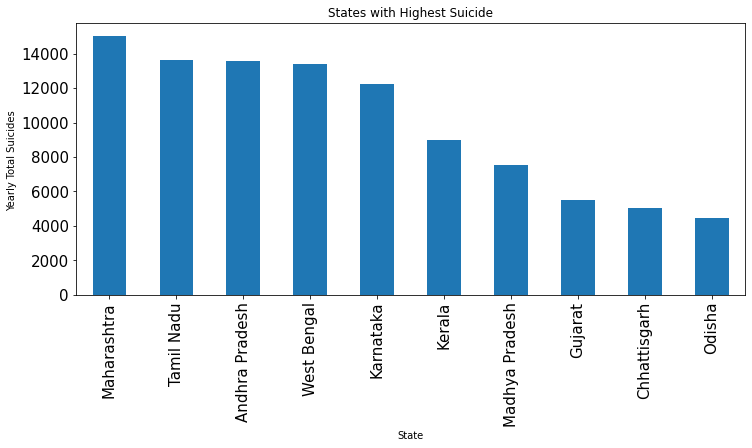

In [16]:
top10_suicide.avg_suicide.plot(kind='bar',figsize=(12,5),title='States with Highest Suicide',fontsize=15,xlabel='State',ylabel='Yearly Total Suicides ');

On an average number of suicides between 2001-12, **Maharashtra with more than 15000 suicides** had the highest number of suicides followed by Tamil Nadu, Andhra Pradesh and West Bengal. Maharashtra, Tamil Nadu are one of the developed states of the country and they have the highest number of suicides.

## Q2. What is the yearly number of suicides in India?

Lets us see how the number of suicides are growing yearly in India. Is it decreasing , increasing ?

In [17]:
# Yearly suicides in India - Group by 'Year' and aggregate using 'Total'
yearly_suicide_df=ind_suicide_df.groupby(['Year'])[['Total']].sum()

In [18]:
yearly_suicide_df
yearly_suicide_df.reset_index()

,Year,Total
0,2001,108506
1,2002,110417
2,2003,110851
3,2004,113697
4,2005,113914
5,2006,118112
6,2007,122637
7,2008,125017
8,2009,127151
9,2010,134599


We can't say much just looking at the numbers and compare against different years. Hence lets plot a bar graph with years on x-axis and total suicides on y-axis to understand the trends.

We will use plot feature of Pandas to plot a bar graph.

In [30]:
yearly_suicide_df.Total.plot?

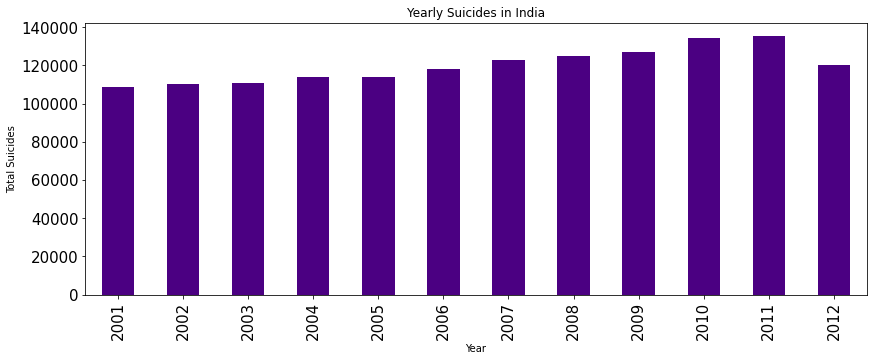

In [31]:
yearly_suicide_df.Total.plot(kind='bar',color='indigo',title='Yearly Suicides in India',xlabel='Year',ylabel='Total Suicides',fontsize=15,figsize=(14,5));

From the graph above we see that from 2001 to 2005 the number of deaths by suicide was more or less same and suddenly after 2006 it started increasing and again came down in 2012.

If we look at the yearly increase in suicide, it is not that large but the number of yearly deaths itself is horrifying. 

Lets visualize using a line graph and see the trends of yearly suicides.

We will use now **Matplotlib** and **Seaborn** libraries for visualization purpose.

In [32]:
# Installing matplotlib and seaborn
!pip install matplotlib seaborn --upgrade --quiet

In [34]:
# Import 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

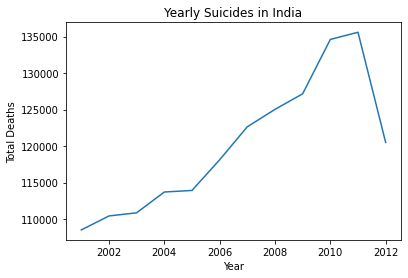

In [35]:
yearly_suicide_df=yearly_suicide_df.reset_index()
plt.plot(yearly_suicide_df.Year, yearly_suicide_df.Total);
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Yearly Suicides in India');

Above is a line graph which shows the increasing trend of number of deaths by suicides in India and observe that the slope is really steep i.e. it is increasing at a very rapid rate with exception in 2012.

## Q3. How does number of deaths by suicide varies from Male to Female? 

Lets visualize number of suicides amongst different sex.

In [45]:
# Create a copy of 4 columns-State , Year, Gender and Total Deaths 
ind_suicide_compact_df=ind_suicide_df.copy()
ind_suicide_compact_df=ind_suicide_compact_df[['Year','Gender','Total']]

In [47]:
#Grouping using Year and Gender then aggregate using Total
gender_wise_yearly_df=ind_suicide_compact_df.groupby(['Year','Gender'])[['Total']].sum()

In [48]:
# Reset index to get the columns back after grouping multiple index
gender_wise_yearly_df=gender_wise_yearly_df.reset_index()


Lets visualize number of suicides based on Gender.

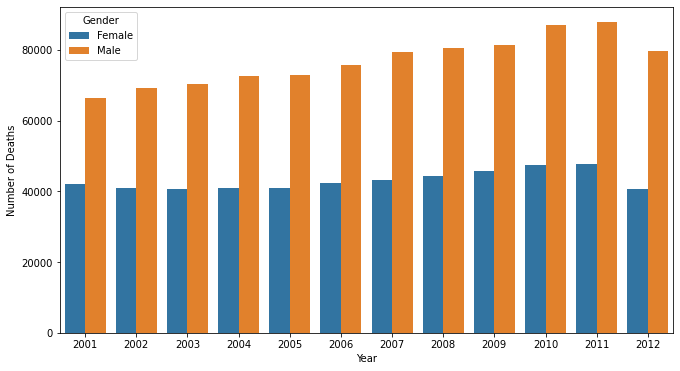

In [79]:
# Plotting using Seaborn
plt.figure(figsize=(11,6))
sns.barplot(x='Year',y='Total',hue='Gender',data=gender_wise_yearly_df);
plt.ylabel('Number of Deaths');

One can see the trends of suicides in different genders. **Male suicide is constantly increasing** but female suicides 
is at the same level in past 12 years. Across the world, male suicides are increasing and same is the scenario in India. Also observe that **number of female suicides is almost half the number of male suicides.**

## Q4. How does the number of suicides compare in different Age groups?

We will analyze now number of deaths in various age-groups. I have wondered myself about the age-group of the people dying by suicide. **Does students and working professional commits highest number of suicides because of work pressure or other life issues?**  Lets look for ourselves.

In [37]:
# Grouping according State, Age-group and gender
state_wise_age_group= ind_suicide_df.groupby(['State', 'Age_group','Gender'])[['Total']].sum()

In [38]:
# Get the indices back after groupby 
state_wise_age_group=state_wise_age_group.reset_index()

In [39]:
state_wise_age_group

,State,Age_group,Gender,Total
0,A & N Islands,0-14,Female,31
1,A & N Islands,0-14,Male,22
2,A & N Islands,15-29,Female,298
3,A & N Islands,15-29,Male,332
4,A & N Islands,30-44,Female,133
...,...,...,...,...
338,West Bengal,30-44,Male,33553
339,West Bengal,45-59,Female,11964
340,West Bengal,45-59,Male,21450
341,West Bengal,60+,Female,3373


It is difficult to analyze by just looking at these numbers. Lets interpret it grpahically.

In [40]:
# Create a separate copy 
age_group_df=state_wise_age_group.copy()

In [41]:
age_group_df

,State,Age_group,Gender,Total
0,A & N Islands,0-14,Female,31
1,A & N Islands,0-14,Male,22
2,A & N Islands,15-29,Female,298
3,A & N Islands,15-29,Male,332
4,A & N Islands,30-44,Female,133
...,...,...,...,...
338,West Bengal,30-44,Male,33553
339,West Bengal,45-59,Female,11964
340,West Bengal,45-59,Male,21450
341,West Bengal,60+,Female,3373


In [42]:
temp=age_group_df[['Age_group','Total']]

In [43]:
age_group_df=temp.groupby(['Age_group'])[['Total']].sum()

In [44]:
age_group_df=age_group_df.reset_index()

In [45]:
age_group_df

,Age_group,Total
0,0-14,32685
1,15-29,509776
2,30-44,488713
3,45-59,294333
4,60+,115467


This is total deaths in all age groups from 2001 to 2012. Lets visulalize this pictorially.

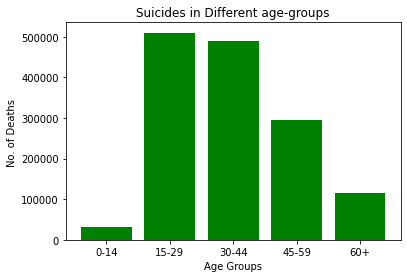

In [46]:
# Plotting a bar graph for various Age-groups
plt.title('Suicides in Different age-groups')
plt.bar(age_group_df.Age_group,age_group_df.Total, color='green');
plt.xlabel('Age Groups')
plt.ylabel('No. of Deaths ');

So, we come to the conclusion that **least number of deaths is between the age group 0-14 and 60+.**

**Highest number of deaths is between age group 15-29 and 30-44.** This age-group indeed suggest that it is young people who are committing most number of suicides.

**Lets observe the percentage wise deaths in different Age-groups**

In [56]:
ax1.pie?

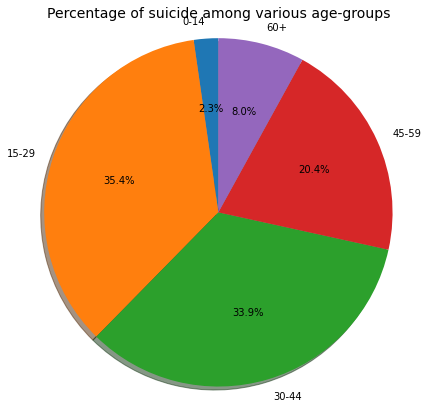

In [55]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['0-14', '15-29', '30-44', '45-59','60+']
fig1,ax1 = plt.subplots()
ax1.pie(age_group_df.Total,labels=labels,shadow=True, startangle=90,autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of suicide among various age-groups',fontsize=14)
#  Increase the size of the Pie chart
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show();

**Observe again that more than 69% of the suicides are done by the age-group between 15 to 44,** and amongst that most by individuals in their **teens and twenties**.

**Plotting a heatmap for the same observation for different years and different age-groups**

In [172]:
#Groupby using Year and Age-group and aggregate by 'Total'
age_wise_df=ind_suicide_df.groupby(['Year','Age_group'])[['Total']].sum()

In [173]:
age_wise_df=age_wise_df.reset_index()

In [174]:
age_wise_df=age_wise_df[age_wise_df.Age_group!='0-100+']

In [192]:
# Setting up pivot for the 2d-array
new_age_wise=age_wise_df.pivot(index='Age_group',columns='Year',values='Total')

In [183]:
new_age_wise

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Age_group,,,,,,,,,,,,
0-14,9010,8632,7728,8733,7665,7389,7410,7143,8851,9390,9096,7363
15-29,116655,117864,119483,120407,120701,126640,129477,133955,131745,142867,144037,130206
30-44,109344,112529,111042,114872,114548,122097,125475,130676,130452,134534,138640,127390
45-59,64737,65482,66991,69400,70874,70815,76699,75574,79808,83618,81876,79303
60+,25682,26639,27272,27543,27929,27378,28784,27632,30271,33319,32340,32136


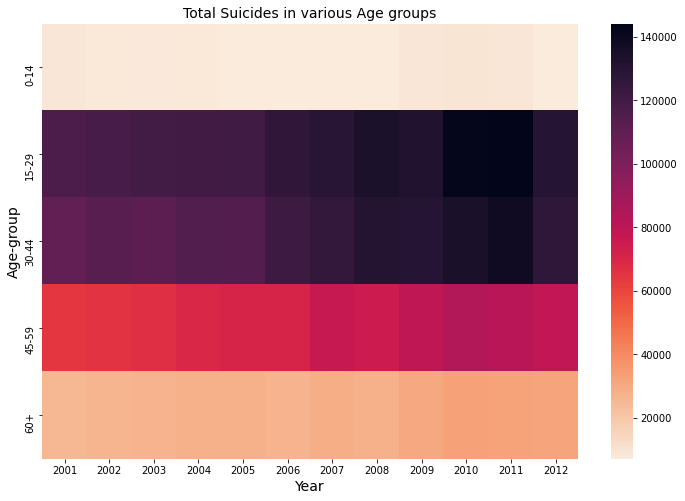

In [191]:
#Plotting using Heat map
plt.figure(figsize=(12,8))
sns.heatmap(new_age_wise,cmap='rocket_r');
plt.title('Total Suicides in various Age groups',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Age-group',fontsize=14);

As observed from the heatmap , that the middle slices which is age-group 15-44 has maximum number of suicides and it is also increasing every year.

## Q5. What are the main causes of suicides?

Lets look at the main causes of suicides. This might help in addressing this issue in general.

We first look all possible causes listed in this dataset.

In [91]:
ind_suicide_df['Type'].unique()

array(['Love Affairs', 'Other Causes (Please Specity)',
       'Other Prolonged Illness', 'Failure in Examination',
       'Causes Not known', 'Family Problems', 'Insanity/Mental Illness',
       'Death of Dear Person', 'Unemployment',
       'Fall in Social Reputation', 'Suspected/Illicit Relation',
       'Cancellation/Non-Settlement of Marriage',
       'Not having Children(Barrenness/Impotency', 'Poverty',
       'Professional/Career Problem', 'Paralysis',
       'Bankruptcy or Sudden change in Economic', 'Divorce', 'Cancer',
       'Property Dispute', 'Illness (Aids/STD)',
       'Physical Abuse (Rape/Incest Etc.)', 'Drug Abuse/Addiction',
       'Ideological Causes/Hero Worshipping', 'Dowry Dispute',
       'Illegitimate Pregnancy',
       'Bankruptcy or Sudden change in Economic Status',
       'Not having Children (Barrenness/Impotency'], dtype=object)

There are lot of causes listed but we can group some of them together to analyze and have a short list of causes. For example, *Other Prolonged Illness, Illness (Aids/STD), Cancer , Insanity* can be grouped into a cause with named **Illness**. Similarly, we can group Family Problems, Marriage Issues, Professional Problems etc.

I have considered here the following major cause of suicides and grouped them together as discussed above. The updated causes are **Family Problems, Illness, Exam/Unemployment, Love Affairs, Career Problem, Poverty, and Drug Abuse.**

In [57]:
ind_suicide_df

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
...,...,...,...,...,...,...,...
236650,West Bengal,2011,Causes,Other Prolonged Illness,Male,60+,41
236651,West Bengal,2011,Causes,Fall in Social Reputation,Male,60+,3
236652,West Bengal,2011,Causes,Insanity/Mental Illness,Male,60+,35
236653,West Bengal,2011,Causes,Other Causes (Please Specity),Male,60+,136


In [92]:
# Just keeping Type column and Total
suicide_causes_df=ind_suicide_df.groupby(['Type'])[['Total']].sum()

In [93]:
# Getting the columns back after groupby
suicide_causes_df=suicide_causes_df.reset_index()

In [94]:
#suicide_causes_df

,Type,Total
0,Bankruptcy or Sudden change in Economic,32755
1,Bankruptcy or Sudden change in Economic Status,2655
2,Cancellation/Non-Settlement of Marriage,11296
3,Cancer,9058
4,Causes Not known,237069
5,Death of Dear Person,10321
6,Divorce,4133
7,Dowry Dispute,31970
8,Drug Abuse/Addiction,30046
9,Failure in Examination,27005


In [95]:
# Create a copy
suicide_causes_copy=suicide_causes_df.copy()

Below we group various causes into one updating into 7 most common cause as listed above.

In [97]:
# Update list of family problems
Family_problems=['Death of Dear Person','Dowry Dispute','Not having Children (Barrenness/Impotency']
for i in range(28):
    if suicide_causes_copy.at[i,'Type'] in Family_problems:
        suicide_causes_copy.at[i,'Type']='Family Problems'

In [98]:
# Update List of Illness
illness=['Cancer','Illness (Aids/STD)', 'Insanity/Mental Illness', 'Other Prolonged Illness', 'Paralysis']
for i in range(28):
    if suicide_causes_copy.at[i,'Type'] in illness:
        suicide_causes_copy.at[i,'Type']='Illness'

In [115]:
# Career Problem, Drug Abuse, Exam/Unemployment and setting unknown causes value to 0
for i in range(28):
    if suicide_causes_copy.at[i,'Type'] == 'Professional/Career Problem':
        suicide_causes_copy.at[i,'Type']='Career Problem'
    if suicide_causes_copy.at[i,'Type'] == 'Drug Abuse/Addiction':
        suicide_causes_copy.at[i,'Type']='Drug Abuse'
    if suicide_causes_copy.at[i,'Type'] in ['Failure in Examination', 'Unemployment']:
        suicide_causes_copy.at[i,'Type']='Exam/Unemployment'
    if suicide_causes_copy.at[i,'Type'] =='Other Causes (Please Specity)':
        suicide_causes_copy.at[i,'Total']=0
    if suicide_causes_copy.at[i,'Type'] =='Causes Not known':
        suicide_causes_copy.at[i,'Total']=0
    if suicide_causes_copy.at[i,'Type'] =='Bankruptcy or Sudden change in Economic':
        suicide_causes_copy.at[i,'Type']= 'Economic Reason'
    

In [116]:
# Group by using newly updated types and aggregate using Total
suicide_causes=suicide_causes_copy.groupby('Type')[['Total']].sum()
suicide_causes=suicide_causes.reset_index()

In [117]:
suicide_causes

,Type,Total
0,Bankruptcy or Sudden change in Economic Status,2655
1,Cancellation/Non-Settlement of Marriage,11296
2,Career Problem,12554
3,Causes Not known,0
4,Divorce,4133
5,Drug Abuse,30046
6,Economic Reason,32755
7,Exam/Unemployment,54370
8,Fall in Social Reputation,13464
9,Family Problems,385009


Above are the number of deaths and their causes. We will visualize graphically top causes of deaths.

In [118]:
suicide_causes=suicide_causes.sort_values('Total',ascending=False).head(7)

In [119]:
suicide_causes

,Type,Total
9,Family Problems,385009
12,Illness,313861
7,Exam/Unemployment,54370
13,Love Affairs,45039
6,Economic Reason,32755
17,Poverty,32684
5,Drug Abuse,30046


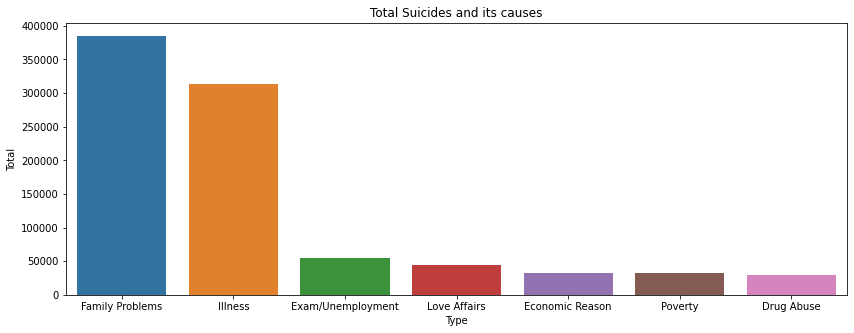

In [121]:
# Plotting bar graph with total in y-axis and type in x-axis
plt.figure(figsize=(14, 5))
plt.title("Total Suicides and its causes")
sns.barplot(y='Total',x='Type',data=suicide_causes);

**Family Problems and Illness the biggest cause of deaths by sucide.** Career Problems and other causes are way too less compared to Family Problems and Illness. 

In [2]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "akramit/suicides-in-india" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/akramit/suicides-in-india


'https://jovian.ml/akramit/suicides-in-india'

## Means Adopted to commit suicides

We will look into some of the most common means adopted to commit suicide.

In [95]:
# Filtering out the only Means_adopted column using
means_adopted_df=ind_suicide_df[ind_suicide_df.Type_code=='Means_adopted']

In [74]:
means_adopted_df

,State,Year,Type_code,Type,Gender,Age_group,Total
277,A & N Islands,2001,Means_adopted,By Hanging,Female,0-14,2
307,A & N Islands,2001,Means_adopted,By Hanging,Male,0-14,2
312,A & N Islands,2001,Means_adopted,By Fire/Self Immolation,Female,15-29,2
315,A & N Islands,2001,Means_adopted,By Consuming Other Poison,Female,15-29,9
316,A & N Islands,2001,Means_adopted,By Hanging,Female,15-29,20
...,...,...,...,...,...,...,...
237393,West Bengal,2012,Means_adopted,By Jumping off Moving Vehicles/Trains,Male,60+,7
237394,West Bengal,2012,Means_adopted,By Consuming Insecticides,Male,60+,53
237395,West Bengal,2012,Means_adopted,By Other means (please specify),Male,60+,241
237396,West Bengal,2012,Means_adopted,By Consuming Other Poison,Male,60+,99


In [75]:
# Groupby using 'Type' and aggregating using 'Total'
means_adopted_df=means_adopted_df.groupby(['Type'])[['Total']].sum()

In [77]:
means_adopted_df=means_adopted_df.reset_index()

In [81]:
top10_means_adopted=means_adopted_df.sort_values(['Total'],ascending=False).head(10)

In [82]:
top10_means_adopted

,Type,Total
5,By Hanging,460955
0,By Consuming Insecticides,275501
1,By Consuming Other Poison,231178
11,By Other means (please specify),135132
4,By Fire/Self Immolation,128006
2,By Drowning,96711
15,By coming under running vehicles/trains,45299
12,By Over Alcoholism,15973
16,By touching electric wires,10816
13,By Overdose of sleeping pills,9960


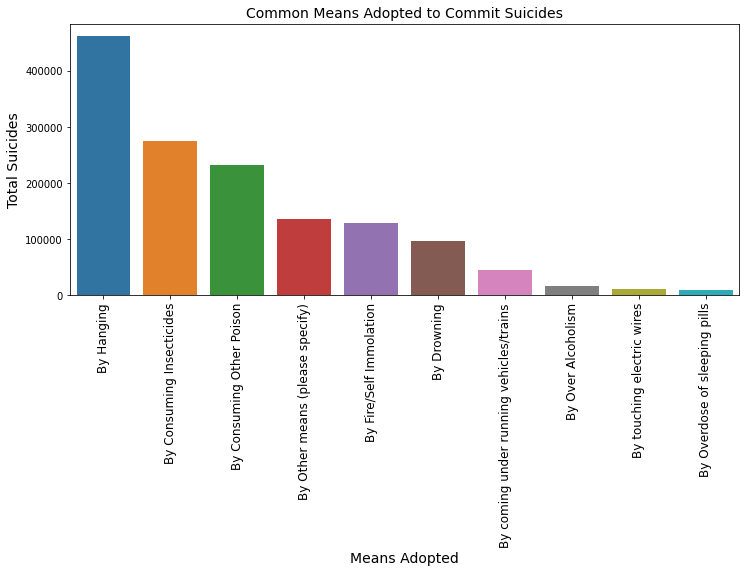

In [94]:
# Plot  a bargraph using seaborn
plt.figure(figsize=(12,5))
sns.barplot(x='Type',y='Total',data=top10_means_adopted)
plt.title('Common Means Adopted to Commit Suicides', fontsize=14)
plt.xlabel('Means Adopted',fontsize=14)
plt.ylabel('Total Suicides',fontsize=14)
plt.xticks(rotation=90,fontsize=12);

It can be observed from above barplot that **Hanging and Consuming Poison or Insecticides** are the most common means adopted for committing suicides. 

## Inferences and Conclusion

**These are some of the inferences which can be drawn from the analysis done above**
1. India has one of the highest percentage of deaths by suicide.
2. Male suicides are far more higher than compared to female.
3. The most suicides are done by individuals in the age-group 15-29 with more than 35% of total deaths.
4. Female suicide is constant since 2001 but male suicide is increasing every year.
5. The main cause of suicide is Family problems and Illness.
6. Most common means adopted to end life is 'By Hanging'.

## Dataset Link

The dataset was obtained from Kaggle. Here is the [Link.](https://www.kaggle.com/rajanand/suicides-in-india)

## References

Some of the references used while making this project.

1. https://pandas.pydata.org/docs/ 
2. https://matplotlib.org/
3. https://seaborn.pydata.org/
4. https://www.drawingfromdata.com
5. https://www.kite.com/python/